In [1]:
from header import *
import scipy.constants as cnst

In [2]:
# --- constants --- 

#masses of nuclear particles:
        
#time unit in seconds 
T_unit=10**(-15)
L_unit=10**(-11)
E_unit=cnst.eV
M_unit=E_unit*T_unit**2/L_unit**2

assert(M_unit==E_unit*T_unit**2/L_unit**2)

#mass of the alpha particle
m1=(cnst.physical_constants['alpha particle mass'][0])/M_unit

#mass of the muon
m2=(cnst.physical_constants['muon mass'][0])/M_unit

#mass of the electron
m3=cnst.m_e/M_unit

m2=m3

#hbar
hbar=cnst.hbar/(E_unit*T_unit)

#elementry charge
e=cnst.e

#vacume permiativity
epsilon0=(cnst.physical_constants['vacuum electric permittivity'][0])*L_unit*E_unit



In [3]:
#prefactor
def pref(lambdas):
    return (
        lambdas[0]/np.sqrt(lambdas[3]*lambdas[6])
        *lambdas[1]/np.sqrt(lambdas[4]*lambdas[7])
        *lambdas[2]/np.sqrt(lambdas[5]*lambdas[8])
        )

#messy norm term
def mnt(x,y,z): 
    return (x**2*(y+z)+y**2*(x+z)+z**2*(x+y)+x*y*z)

def I110(lambdas):

    I=(
        0.5
        *pref(lambdas)
        *((2*lambdas[0]**2 + lambdas[0]*lambdas[1] + lambdas[0]*lambdas[2] + lambdas[1]*lambdas[2])
        /(
            np.sqrt(mnt(lambdas[3],lambdas[4],lambdas[5]))
            *np.sqrt(mnt(lambdas[6],lambdas[7],lambdas[8])) 
        ))
        )
    
    return I

def I111(lambdas):

    I=(
        pref(lambdas)
        *(mnt(lambdas[0],lambdas[1],lambdas[2])
        /(
            np.sqrt(mnt(lambdas[3],lambdas[4],lambdas[5]))
            *np.sqrt(mnt(lambdas[6],lambdas[7],lambdas[8])) 
        ))
        )
    return I

def I210(lambdas):
        
    I=(
        pref(lambdas)
        *((lambdas[0]**2*(3*lambdas[0]+2*lambdas[1]+lambdas[2])+lambdas[1]**2*(lambdas[0]+lambdas[2]) + lambdas[0]*lambdas[1]*lambdas[2])
        /(
            np.sqrt(mnt(lambdas[3],lambdas[4],lambdas[5]))
            *np.sqrt(mnt(lambdas[6],lambdas[7],lambdas[8])) 
        ))
        )
    
    return I

def I300(lambdas):

    I=(
        3
        *pref(lambdas)
        *(lambdas[0]**2+lambdas[1]**2)/np.sqrt(mnt(lambdas[3],lambdas[4],lambdas[5]))
        *(lambdas[0]+lambdas[1])/np.sqrt(mnt(lambdas[6],lambdas[7],lambdas[8]))
        )

    return I

In [4]:
def N_func(i,j,alphas,betas,gammas):
    lambdas=[
        1/(np.conjugate(alphas[i])+alphas[j]+np.conjugate(betas[i])+betas[j]),1/(np.conjugate(alphas[i])+alphas[j]+np.conjugate(gammas[i])+gammas[j]),  1/(np.conjugate(betas[i])+betas[j]+np.conjugate(gammas[i])+gammas[j]),  
        0.5/(np.real(alphas[i])+np.real(betas[i])), 0.5/(np.real(alphas[i])+np.real(gammas[i])), 0.5/(np.real(betas[i])+np.real(gammas[i])),
         0.5/(np.real(alphas[j])+np.real(betas[j])), 0.5/(np.real(alphas[j])+np.real(gammas[j])), 0.5/(np.real(betas[j])+np.real(gammas[j]))
        ]
    I=I111(lambdas)
    
    return I

In [5]:
def order(first,second,third,lambdas):
    return [lambdas[first],lambdas[second],lambdas[third],
            lambdas[3+first],lambdas[3+second],lambdas[3+third],
            lambdas[6+first],lambdas[6+second],lambdas[6+third]]

In [6]:

def H_func(i,j,alphas,betas,gammas):

	lambdas=[
		1/(np.conjugate(alphas[i])+alphas[j]+np.conjugate(betas[i])+betas[j]),1/(np.conjugate(alphas[i])+alphas[j]+np.conjugate(gammas[i])+gammas[j]),  1/(np.conjugate(betas[i])+betas[j]+np.conjugate(gammas[i])+gammas[j]),  
		0.5/(np.real(alphas[i])+np.real(betas[i])), 0.5/(np.real(alphas[i])+np.real(gammas[i])), 0.5/(np.real(betas[i])+np.real(gammas[i])),
		0.5/(np.real(alphas[j])+np.real(betas[j])), 0.5/(np.real(alphas[j])+np.real(gammas[j])), 0.5/(np.real(betas[j])+np.real(gammas[j]))
		]

	T=-0.5*hbar**2*(
			((alphas[j]**2+betas[j]**2)/m1  +  (alphas[j]**2+gammas[j]**2)/m2  +  (betas[j]**2+gammas[j]**2)/m3)*I111(lambdas)
			
			-2*alphas[j]*(1/m1+1/m2)*I110(order(2,1,0,lambdas))
			-2*betas[j]*(1/m1+1/m3)*I110(order(0,2,1,lambdas))  
			-2*gammas[j]*(1/m2+1/m3)*I110(lambdas) 
				
			+alphas[j]*betas[j]/m1*(I210(lambdas)+I210(order(1,0,2,lambdas))-I300(order(2,1,0,lambdas)))
			+alphas[j]*gammas[j]/m2*(I210(order(0,2,1,lambdas))+I210(order(2,0,1,lambdas))-I300(order(1,0,2,lambdas)))
			+betas[j]*gammas[j]/m3*(I210(order(1,2,0,lambdas))+I210(order(2,1,0,lambdas))-I300(lambdas))
			)
	
	
	V=(e**2/(4*np.pi*epsilon0))*(-2*I110(order(2,1,0,lambdas))-2*I110(order(0,2,1,lambdas))+I110(lambdas))

	return (T+V)

In [7]:
subspace=Subspace(2)

subspace.set_N_func(N_func)
subspace.set_H_func(H_func)

params=np.array([
    [[0.031],[0.1]],
    [[0.031],[0.1]],
    [[0.0045],[0.01]]])*L_unit/10**(-12)

subspace.set_params(1,params)

subspace.make_N_mats()
subspace.make_H_mats()
subspace.find_N_eigens()
subspace.make_Y_mats()
subspace.make_invs_sqrt_beta_mats()
subspace.make_P_mats()
subspace.find_P_eigens()
subspace.find_energy_levels()

print(subspace.energy_levels)

Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
[[-69.86106415 215.72425866]]


In [8]:
print(subspace.P_eigenvalues)

[[215.72425866 -69.86106415]]


In [9]:
subspace.find_energy_eigenstates()
print(subspace.energy_eigenstates)

Calculating the components of the energy eigenstates.
[[[ 0.99953732 -0.0304163 ]
  [ 0.49334438 -0.86983408]]]


In [10]:
print(subspace.P_mats[0])# why not hermitian !!!!!!!!! :))))))))))))))))

[[150.92019583 154.58918273]
 [ 92.5519004   -5.05700133]]


In [11]:
print(subspace.N_mats[0])

[[1.        0.3946372]
 [0.3946372 1.       ]]


In [12]:
print(subspace.H_mats[0])# why not hermitian

[[-71.38679382 -77.7081533 ]
 [-20.70600129 155.69558406]]


In [13]:
subspace=Subspace(1)

subspace.set_N_func(N_func)
subspace.set_H_func(H_func)

params=np.array([
    [[0.031]],
    [[0.031]],
    [[0.0045]]])

subspace.set_params(1,params)

subspace.make_N_mats()
subspace.make_H_mats()
subspace.find_N_eigens()
subspace.make_Y_mats()
subspace.make_invs_sqrt_beta_mats()
subspace.make_P_mats()
subspace.find_P_eigens()
subspace.find_energy_levels()

print(subspace.energy_levels)

Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
[[-12.38135616]]


1
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
2
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
3
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
4
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenval

C:\Users\myles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


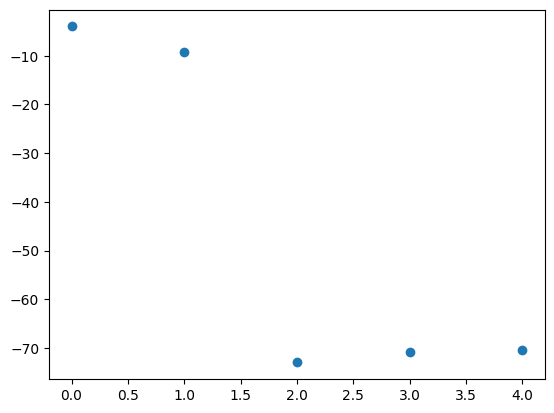

In [14]:

E=[]

ns=[1,2,3,4,5]

for n in ns:
    print(n)
    subspace=Subspace(n**2)

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    param_range=np.linspace(0.001,0.1,n)
    params=np.expand_dims(np.array(np.meshgrid(param_range,param_range/10,indexing='ij')).reshape(2,-1),-1)
    params=np.array([params[0],params[0],params[1]])*L_unit/10**(-12)

    subspace.set_params(1,params)

    subspace.make_N_mats_vectorized()
    subspace.make_H_mats_vectorized()
    subspace.find_N_eigens()
    subspace.make_Y_mats()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()
    subspace.find_energy_levels()

    E.append(subspace.energy_levels[:,0])
    
import matplotlib.pyplot as plt
plt.scatter(np.arange(len(E)),E)

plt.show()

In [ ]:
from scipy.optimize import minimize

def f(x):
    if np.any(x<=0):
        return 10000

    return H_func(0,0,[x[0]],[x[1]],[x[2]])

minimize(f,x0=[0.1,0.1,0.1])



  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -48.70829241212152
        x: [ 8.706e-01  3.108e-01  4.805e-01]
      nit: 1
      jac: [-4.260e+02  1.109e+03  6.480e+02]
 hess_inv: [[ 5.720e+00 -1.771e-01  1.301e+00]
            [-1.771e-01  3.274e-01 -5.246e-01]
            [ 1.301e+00 -5.246e-01  1.025e+00]]
     nfev: 347
     njev: 85